In [3]:
import numpy as np

def objective_function(x):
    # The objective function to be optimized
    return x[0]**2 + x[1]**2

def spiral_optimization(num_particles, max_iterations):
    # Initialize particles with random positions and velocities
    particles = np.random.uniform(-5, 5, (num_particles, 2))
    velocities = np.random.uniform(-1, 1, (num_particles, 2))
    personal_best_positions = particles.copy()
    personal_best_values = np.apply_along_axis(objective_function, 1, personal_best_positions)
    global_best_index = np.argmin(personal_best_values)
    global_best_position = personal_best_positions[global_best_index]
    global_best_value = personal_best_values[global_best_index]
    
    for iteration in range(max_iterations):
        for i in range(num_particles):
            # Update velocity and position of particles
            inertia_weight = 0.7
            cognitive_weight = 1.5
            social_weight = 1.5
            velocities[i] = inertia_weight * velocities[i] + \
                            cognitive_weight * np.random.random() * (personal_best_positions[i] - particles[i]) + \
                            social_weight * np.random.random() * (global_best_position - particles[i])
            particles[i] = particles[i] + velocities[i]
            
            # Evaluate the objective function
            current_value = objective_function(particles[i])
            
            # Update personal best
            if current_value < personal_best_values[i]:
                personal_best_positions[i] = particles[i]
                personal_best_values[i] = current_value
            
            # Update global best
            if current_value < global_best_value:
                global_best_position = particles[i]
                global_best_value = current_value
        
        print(f"Iteration {iteration+1}: Best Value = {global_best_value:.4f}, Best Position = {global_best_position}")
    
    return global_best_position, global_best_value

# Parameters
num_particles = 20
max_iterations = 50

# Run spiral optimization
best_position, best_value = spiral_optimization(num_particles, max_iterations)
print("Optimization result:")
print(f"Best Value = {best_value:.4f}, Best Position = {best_position}")


Iteration 1: Best Value = 0.0393, Best Position = [0.16172067 0.11452445]
Iteration 2: Best Value = 0.0393, Best Position = [-0.48536688  1.53435672]
Iteration 3: Best Value = 0.0393, Best Position = [-0.7701816   2.15929399]
Iteration 4: Best Value = 0.0168, Best Position = [0.03387772 0.12522629]
Iteration 5: Best Value = 0.0168, Best Position = [ 0.1839192  -0.42697246]
Iteration 6: Best Value = 0.0168, Best Position = [ 0.13711839 -0.25473112]
Iteration 7: Best Value = 0.0168, Best Position = [-0.03887513  0.39297912]
Iteration 8: Best Value = 0.0168, Best Position = [-0.11148162  0.66019333]
Iteration 9: Best Value = 0.0005, Best Position = [0.01465601 0.01661503]
Iteration 10: Best Value = 0.0005, Best Position = [ 0.10295236 -0.43388978]
Iteration 11: Best Value = 0.0005, Best Position = [ 0.16424826 -0.74663319]
Iteration 12: Best Value = 0.0005, Best Position = [ 0.14307749 -0.63861586]
Iteration 13: Best Value = 0.0005, Best Position = [-0.01700628  0.17816211]
Iteration 14: 

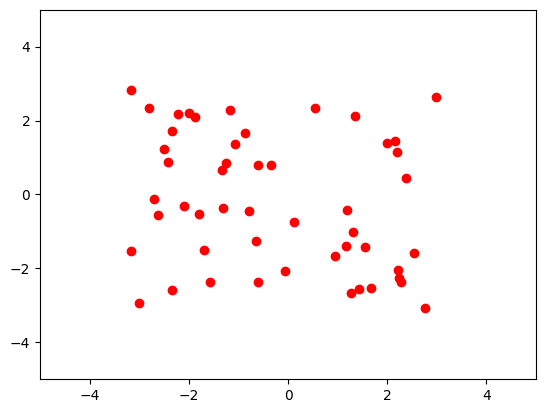

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the spiral-shaped function to optimize
def spiral_function(x, y):
    return (x**2 + y**2) + np.sin(np.sqrt(x**2 + y**2)) * 0.1

# Parameters for the optimization
num_particles = 50
num_iterations = 100
learning_rate = 0.1

# Initialize particles with random positions
particles = np.random.uniform(-5, 5, size=(num_particles, 2))
velocities = np.zeros_like(particles)

# Create a figure for animation
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
scatter = ax.scatter([], [], c='red', marker='o')

# Update function for animation
def update(frame):
    global particles, velocities
    for i in range(num_particles):
        gradient_x = 2 * particles[i, 0] + 0.1 * np.cos(np.sqrt(particles[i, 0]**2 + particles[i, 1]**2)) * particles[i, 0] / np.sqrt(particles[i, 0]**2 + particles[i, 1]**2)
        gradient_y = 2 * particles[i, 1] + 0.1 * np.cos(np.sqrt(particles[i, 0]**2 + particles[i, 1]**2)) * particles[i, 1] / np.sqrt(particles[i, 0]**2 + particles[i, 1]**2)
        velocities[i, 0] = learning_rate * gradient_x
        velocities[i, 1] = learning_rate * gradient_y
        particles[i] -= velocities[i]
    
    scatter.set_offsets(particles)
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_iterations, blit=True)

# Show the animation
plt.show()


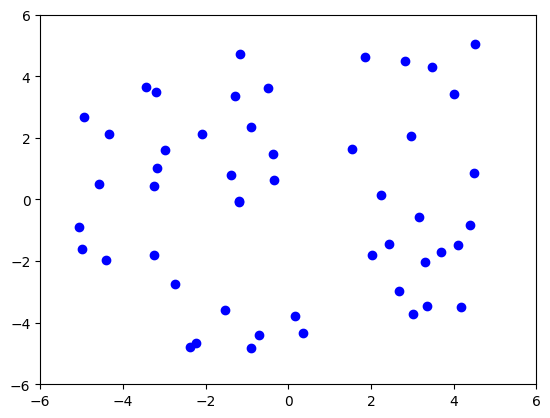

In [5]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters for the animation
num_points = 50
num_frames = 100
move_distance = 0.1

# Create random initial positions for the points
points = np.random.uniform(-5, 5, size=(num_points, 2))

# Create a figure for animation
fig, ax = plt.subplots()
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
scatter = ax.scatter([], [], c='blue', marker='o')

# Update function for animation
def update(frame):
    global points
    for i in range(num_points):
        points[i] += np.random.uniform(-move_distance, move_distance, size=2)
    
    scatter.set_offsets(points)
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, blit=True)

# Show the animation
plt.show()
